## 히스토그램 평활화(Histogram Equalization)
- 특정 영역에 집중되어 있는 영상의 히스토그램 분포를 평평하게 만들어 명암 대비를 높이는 기법
    - 명암 값이 몰려 있어서 어둡기만 한 영상 또는 밝기만 한 영상을 평활화하여 좀 더 선명한 영상을 얻음음
    - 영상의 명암 대비가 높아지면 영상에 있는 물체를 더 잘 식별할 수 있게됨
    - <img src='../cv_images/histogram_equal.png'> 
    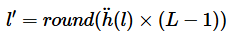     
    < L = 8인 4 x 4 크기의 영상 >     
        1) 계산된 히스토그램 분포 h(g)에 전체 크기인 16씩을 나눠주어 정규화 히스토그램 p(g)를 계산    
        2) 각 명암값 별로 이전까지의 정규화 히스토그램 p(g)값을 합쳐 누적 정규화 히스토그램 cdf(g)를 계산 : 마지막 1        
        3) 각 누적 정규화 히스토그램 값 cdf(g)에 최대 명암값(LmaxLmaxL_{max})인 7씩을 곱하고 반올림          

- 이미지의 전반적인 대비를 개선하기 위해 사용되는 방법
    - 특정 밝기 계급에 픽셀이 지나치게 집중되어 있을 때, 이 방식은 몇 가지 문제점을 초래할 수 있다. 예를 들면, 평활화 후의 이미지에서 나머지 계급의 세부 정보가 손실되거나, 비자연스러운 노이즈나 패턴이 발생할 수 있음

- 히스토그램 매칭(Histogram Matching)은 원하는 히스토그램 분포를 가진 참조 이미지를 사용하여, 타겟 이미지의 분포를 조정하는 방법(입력 이미지에 참조 이미지의 색감을 입히는 기법)

- **히스토그램 평활화 효과**
    - 히스토그램이 너무 한쪽(어두운 쪽)에 몰려 있으면 전체적으로 밝게 펴주는 효과가 있음 => 하지만 무조건 밝게 만드는 게 아니라, 명암 대비(contrast)를 전체적으로 넓게 분포시키는 게 목적임.
    - 히스토그램 평활화는 밝고 어두운 영역의 구분을 명확하게 해줍니다. => 흐릿하거나 뿌연 이미지를 더 뚜렷하게(선명하게) 보이게 만들 수 있음.

- `cv2.equalizeHist(img, dst)`
    - img: 히스토그램 평활화를 적용시키고자 하는 영상 
    - dst: 결과 이미지(입력 안해도됨)

### 히스토그램 평활화 : 흑백 이미지

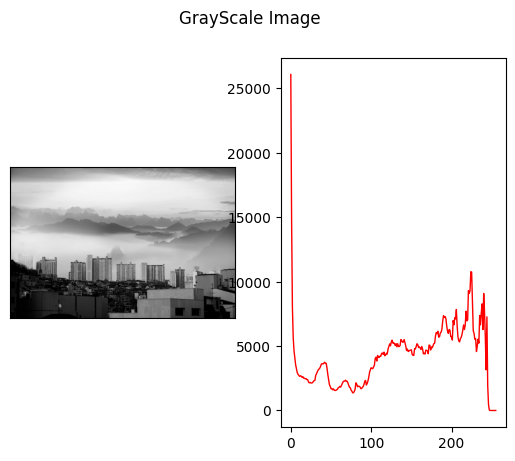

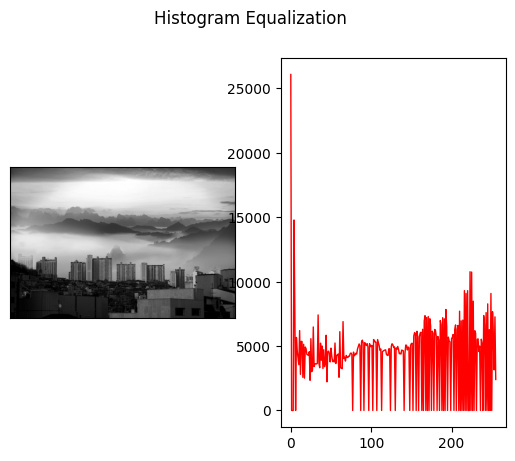

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# 히스토그램 평활화를 적용할 영상 읽기
img = cv.imread("../cv_images/fog_city.jpg")

# grayscale로 변환
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(1)
plt.suptitle('GrayScale Image')
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([])

# histogram 시각화
h = cv.calcHist([gray],[0],None, [256], [0,256]) #히스토그램 계산
plt.subplot(1,2,2)
plt.plot(h,color='r',linewidth=1)

# 히스토그램 평활화 적용
equal = cv.equalizeHist(gray)   # ... 코드 입력 # 히스토그램 평활화
plt.figure(2)
plt.suptitle('Histogram Equalization')
plt.subplot(1,2,1)
plt.imshow(equal, cmap='gray'), plt.xticks([]), plt.yticks([])

# 적용 결과의 histogram 시각화
h = cv.calcHist([equal], [0], None, [256], [0,256])
plt.subplot(1,2,2)
plt.plot(h,color='r', linewidth=1) 
plt.show()


### 히스토그램 평활화 : 컬러 이미지
- 컬러영상에 히스토그램 평활화를 적용할 때 RGB 채널 각각에 히스토그램 평활화를 적용한 후 합치면 색이 변하는 문제가 일어날 수 있음(색이 왜곡되어 부자연스러운 이미지가 되기 때문)
    - RGB는 색상(Hue), 명도(Value), 채도(Saturation)가 섞여 있어서, 각 채널을 독립적으로 평활화하면 원래 색상 관계가 깨져버리기 때문
- 먼저 RGB로 받은 이미지를 HSV 또는 YCrCb 형태의 이미지로 변경한 다음에 밝기값(V(Value)) 채널에 해당하는 V 또는 Y 채널에 대해서만 히스토그램 평활화를 적용해야 색을 변경하지 않고 선명하게 만들 수 있음
    - HSV의 V만 평활화 : 색상 유지, 명도만 개선
    - YCrCb의 Y만 평활화 : 방송용 영상에 적합

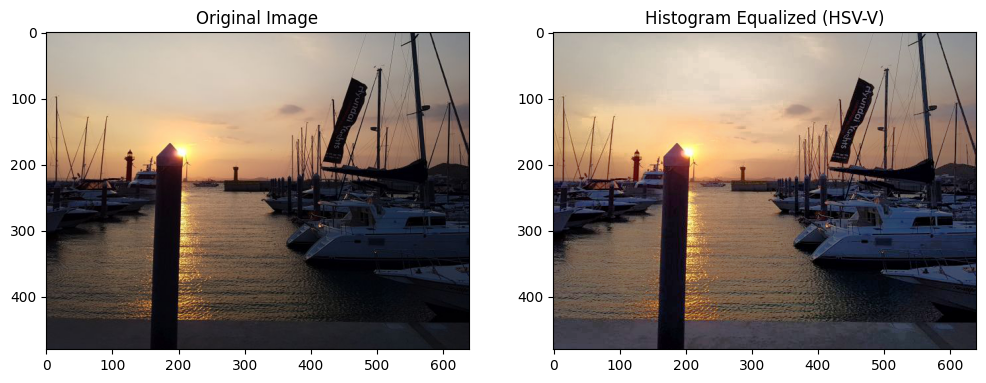

In [5]:
# HSV 색공간에서 V 채널에 히스토그램 평활화 적용
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../cv_images/yate.jpg')  # 컬러 이미지 로드 (BGR)

# HSV 색공간으로 변환 : 컬러 이미지에서는 V(Value) 채널이 밝기를 나타냄
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   #... 코드 입력  

# 채널 분리
h, s, v = cv2.split(hsv)   #... 코드 입력 

# V 채널에 히스토그램 평활화 적용
v_eq = cv2.equalizeHist(v)   #... 코드 입력  

# 다시 HSV 병합 후 BGR로 변환
hsv_eq = cv2.merge((h, s, v_eq))   #... 코드 입력 
img_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Histogram Equalized (HSV-V)')
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
plt.show()


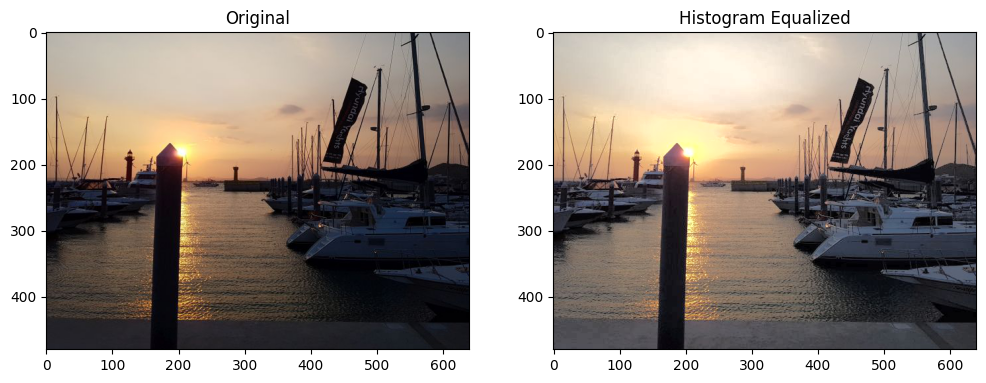

In [6]:
# YCrCb 색공간에서 Y 채널에 히스토그램 평활화 적용
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../cv_images/yate.jpg')

# YCrCb 색공간으로 변환
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Y 채널(명도)만 평활화
y, cr, cb = cv2.split(img_ycrcb)
y_eq = cv2.equalizeHist(y)

# 다시 YCrCb로 합치고 BGR로 복원
img_ycrcb_eq = cv2.merge((y_eq, cr, cb))
img_eq = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2BGR)

# 결과 출력
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized")
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
plt.show()


### ▶ 야간 사진 개선기 - 어두운 사진의 시인성 향상

C:\Users\intel09\AppData\Local\Temp\ipykernel_6916\3022896447.py:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(l.ravel(), 256, [0, 256], color='b', alpha=0.5, label='Original')
C:\Users\intel09\AppData\Local\Temp\ipykernel_6916\3022896447.py:46: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(l_clahe.ravel(), 256, [0, 256], color='r', alpha=0.5, label='CLAHE')


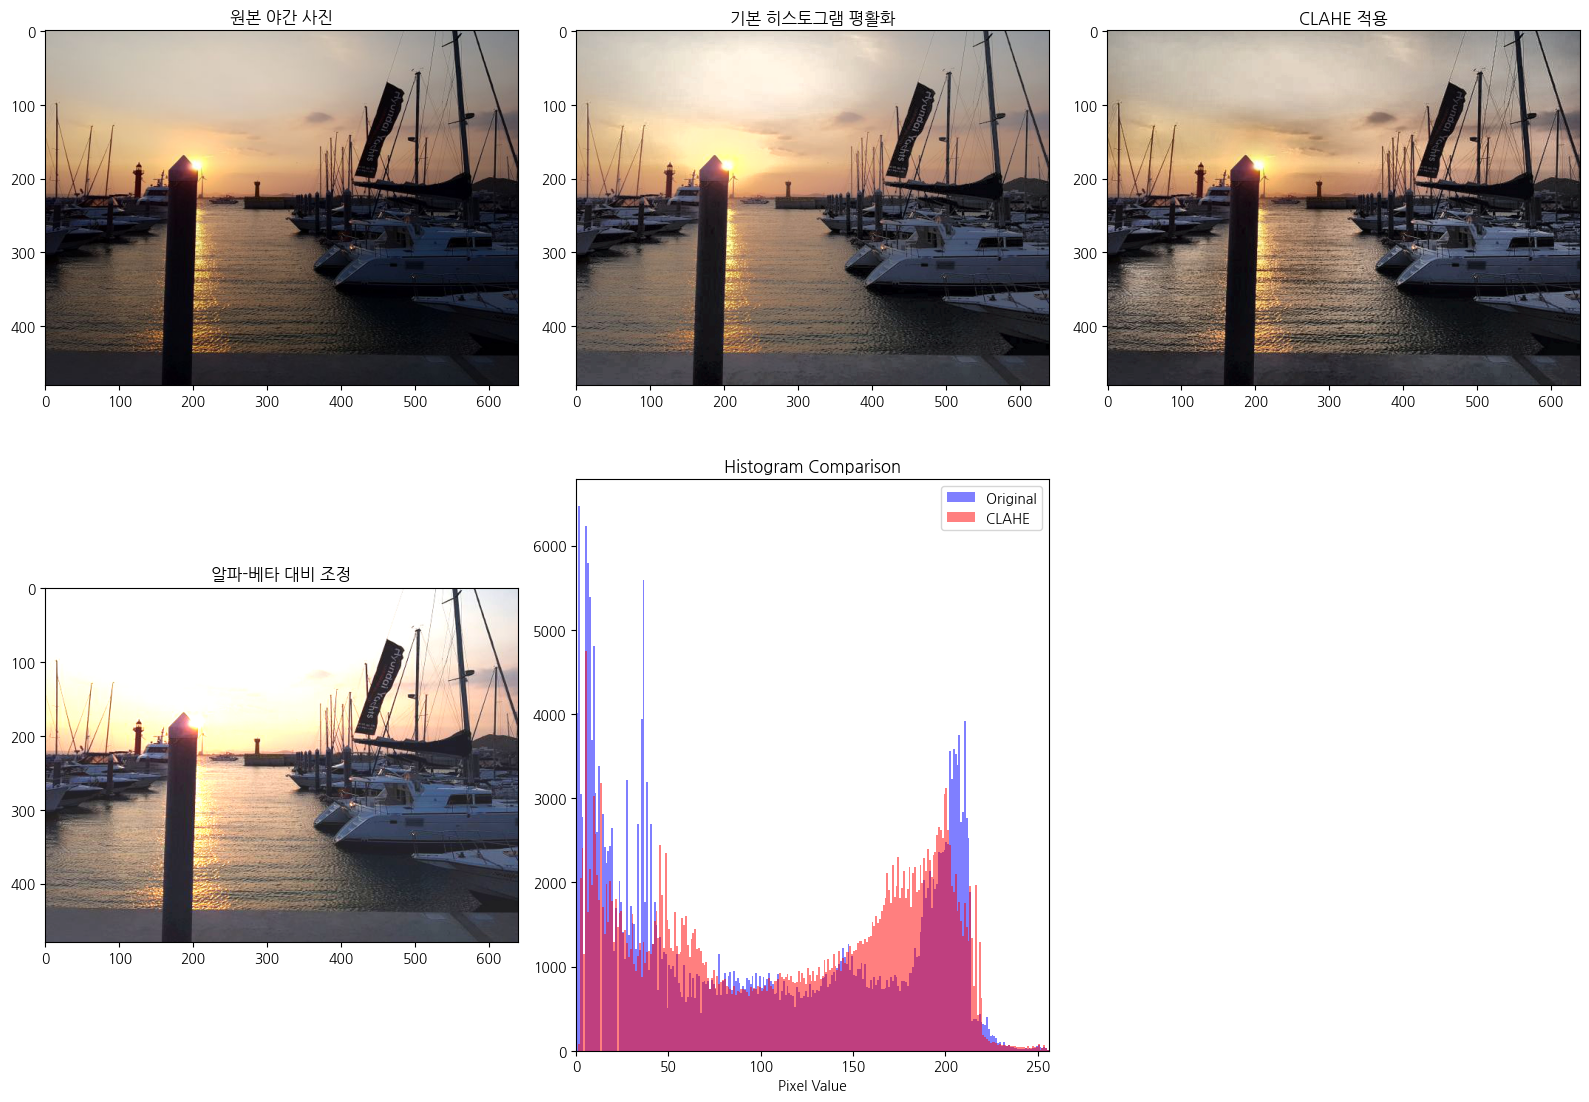

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 어두운 야간 사진 로드
night_img = cv2.imread('../cv_images/yate.jpg')
night_rgb = cv2.cvtColor(night_img, cv2.COLOR_BGR2RGB)
night_lab = cv2.cvtColor(night_img, cv2.COLOR_BGR2LAB)

# L*a*b* 채널 분리
l, a, b = cv2.split(night_lab)

# 히스토그램 평활화 (명도 채널만)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)
simple_eq = cv2.equalizeHist(l)

# 채널 합치기
enhanced_lab = cv2.merge([l_clahe, a, b])
simple_enhanced_lab = cv2.merge([simple_eq, a, b])

# RGB로 변환
enhanced_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
enhanced_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB)
simple_enhanced_img = cv2.cvtColor(simple_enhanced_lab, cv2.COLOR_LAB2BGR)
simple_enhanced_rgb = cv2.cvtColor(simple_enhanced_img, cv2.COLOR_BGR2RGB)

# 세밀한 대비 조정
adjusted = night_img.copy()
alpha = 1.5  # 대비 조정 파라미터
beta = 30    # 밝기 조정 파라미터
adjusted = cv2.convertScaleAbs(night_img, alpha=alpha, beta=beta)
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# 결과 시각화
plt.figure(figsize=(16, 12))
plt.subplot(231), plt.imshow(night_rgb), plt.title('원본 야간 사진')
plt.subplot(232), plt.imshow(simple_enhanced_rgb), plt.title('기본 히스토그램 평활화')
plt.subplot(233), plt.imshow(enhanced_rgb), plt.title('CLAHE 적용')
plt.subplot(234), plt.imshow(adjusted_rgb), plt.title('알파-베타 대비 조정')

# 히스토그램 비교
plt.subplot(235)
plt.hist(l.ravel(), 256, [0, 256], color='b', alpha=0.5, label='Original')
plt.hist(l_clahe.ravel(), 256, [0, 256], color='r', alpha=0.5, label='CLAHE')
plt.legend()
plt.title('Histogram Comparison')
plt.xlabel('Pixel Value')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()